In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import datetime

C:\Users\zxzx2\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('dataM.csv')
df.shape

(54495, 22)

In [5]:
df.head()

Unnamed: 0  Total floor area (m²)  \
0           0                   45.0   
1           1                  143.0   
2           2                   65.0   
3           3                   49.0   
4           4                  212.0   

   Total current energy costs over 3 years (£)  \
0                                       3771.0   
1                                       2793.0   
2                                       1947.0   
3                                       1158.0   
4                                       6477.0   

   Current hot water costs over 3 years (£) Part 1 Construction Age Band  \
0                                    1176.0                  before 1919   
1                                     375.0                    2003-2007   
2                                     441.0                  before 1919   
3                                     195.0                    1999-2002   
4                                     819.0                  before 1919   

   Part 1 Floor 0 Room Height  Low Energy Lighting % Mechanical Ventilation  \
0                        3.10                    100                natural   
1                        2.40                    100                natural   
2                        2.45                    100                natural   
3                        2.40                    100                natural   
4                        2.80                     64                natural   

             Tenure   Transaction Type           wall_insulation  \
0    owner-occupied  none of the above             no insulation   
1    owner-occupied      marketed sale             filled cavity   
2    owner-occupied      marketed sale             no insulation   
3  rented (private)  none of the above                 insulated   
4    owner-occupied      marketed sale  with internal insulation   

          roof_insulation  insulated_wall               wall_type roof_type  \
0  150 mm loft insulation               0  sandstone or limestone   Pitched   
1  250 mm loft insulation               1             cavity wall   Pitched   
2  300 mm loft insulation               0  sandstone or limestone   Unknown   
3  300 mm loft insulation               1             cavity wall   Unknown   
4  270 mm loft insulation               1    granite or whinstone   Pitched   

  floor_type windows_glazing  MMH_mains gas  MHCS_programmer  \
0    Unknown   double glazed          False             True   
1  Suspended   double glazed           True             True   
2      Solid   single glazed           True             True   
3  Suspended   double glazed           True             True   
4      Solid   double glazed          False             True   

                                low_lighting  SH_room heaters  \
0  low energy lighting 100% of fixed outlets            False   
1  low energy lighting 100% of fixed outlets            False   
2  low energy lighting 100% of fixed outlets            False   
3  low energy lighting 100% of fixed outlets            False   
4   low energy lighting 60% of fixed outlets             True   

  Current energy efficiency rating band  
0                                     E  
1                                     C  
2                                     C  
3                                     C  
4                                     E

In [6]:
objList = df.select_dtypes(include = "object").columns
# Label Encoding for object to numeric conversion
epc_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    epc_encoded[feat] = le.fit_transform(df[feat].astype(str))

epc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54495 entries, 0 to 54494
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   54495 non-null  int64  
 1   Total floor area (m²)                        54495 non-null  float64
 2   Total current energy costs over 3 years (£)  54495 non-null  float64
 3   Current hot water costs over 3 years (£)     54495 non-null  float64
 4   Part 1 Construction Age Band                 54495 non-null  int32  
 5   Part 1 Floor 0 Room Height                   54495 non-null  float64
 6   Low Energy Lighting %                        54495 non-null  int64  
 7   Mechanical Ventilation                       54495 non-null  int32  
 8   Tenure                                       54495 non-null  int32  
 9   Transaction Type                             54495 non-null  int32  
 10

In [7]:
epc_encoded.head()

Unnamed: 0  Total floor area (m²)  \
0           0                   45.0   
1           1                  143.0   
2           2                   65.0   
3           3                   49.0   
4           4                  212.0   

   Total current energy costs over 3 years (£)  \
0                                       3771.0   
1                                       2793.0   
2                                       1947.0   
3                                       1158.0   
4                                       6477.0   

   Current hot water costs over 3 years (£)  Part 1 Construction Age Band  \
0                                    1176.0                            10   
1                                     375.0                             8   
2                                     441.0                            10   
3                                     195.0                             7   
4                                     819.0                            10   

   Part 1 Floor 0 Room Height  Low Energy Lighting %  Mechanical Ventilation  \
0                        3.10                    100                       2   
1                        2.40                    100                       2   
2                        2.45                    100                       2   
3                        2.40                    100                       2   
4                        2.80                     64                       2   

   Tenure  Transaction Type  wall_insulation  roof_insulation  insulated_wall  \
0       0                 7                4                3               0   
1       0                 4                0                6               1   
2       0                 4                4                8               0   
3       1                 7                3                8               1   
4       0                 4                8                7               1   

   wall_type  roof_type  floor_type  windows_glazing  MMH_mains gas  \
0          5          1           4                0          False   
1          1          1           1                0           True   
2          5          4           0                4           True   
3          1          4           1                0           True   
4          3          1           0                0          False   

   MHCS_programmer  low_lighting  SH_room heaters  \
0             True             2            False   
1             True             2            False   
2             True             2            False   
3             True             2            False   
4             True             7             True   

   Current energy efficiency rating band  
0                                      4  
1                                      2  
2                                      2  
3                                      2  
4                                      4

In [8]:
from sklearn.preprocessing import LabelEncoder
# Split data into features and labels
X = epc_encoded.drop("Current energy efficiency rating band", axis=1)
y = epc_encoded["Current energy efficiency rating band"]

In [9]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
def plot_conf_mat(y_test, y_pred):
    '''prints the confusion matrix'''
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.8)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='small')

    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=10)
    plt.show()
    return

# Hyperparameter using random search

# Hyperparameter svm

In [10]:
from sklearn.svm import SVC

In [11]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']} 
SVM_Model = SVC(gamma='auto')
from sklearn.model_selection import RandomizedSearchCV 
random_Grid = RandomizedSearchCV (estimator = SVM_Model, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = -1)

In [12]:
random_Grid.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 290.4min finished


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [13]:
random_Grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}

# Hyperparameter XGB

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [13]:

# Define the search space
param_grid1 = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [.2,.3, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": [int(x) for x in np.linspace(10, 120, num = 12)],
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [0.5, 1, 1.5, 2, 5],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [0.6, 0.8, 1.0],
    # Number of trees 
    "n_estimators": [600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
xgboost = XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 30 different combinations, and use all available cores
random_search = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid1, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [14]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 155.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 604.7min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           num_parallel_tree=None,
                                           predictor=None, random_state

In [15]:
print(random_search.best_params_)

{'n_estimators': 1400, 'max_depth': 30, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}


In [ ]:
n_estimators=1400,max_depth=30,learning_rate=0.01,gamma= 1, colsample_bytree=0.8


# Hyperparameter RF

In [24]:
n_estimators = [600, 800, 1000, 1200, 1400, 1600, 1800, 2000] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 30, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [25]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 42.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [600, 800, 1000, 1200,
                                                         1400, 1600, 1800,
                                                         2000]},
                   random_state=35, verbose=2)

In [27]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 1600, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}  



In [ ]:
n_estimators=1600,min_samples_split=6,min_samples_leaf= 1,max_features='auto',max_depth=80,bootstrap=False


# model after optimize 

In [16]:
#libraries we need
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
import time
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=6,
                       n_estimators=1600)
              precision    recall  f1-score   support

           0       0.79      0.48      0.60       213
           1       0.91      0.86      0.88      2609
           2       0.90      0.92      0.91      7298
           3       0.81      0.86      0.83      4219
           4       0.75      0.71      0.73      1452
           5       0.66      0.59      0.62       434
           6       0.74      0.43      0.54       124

    accuracy                           0.86     16349
   macro avg       0.79      0.69      0.73     16349
weighted avg       0.86      0.86      0.86     16349


r2: 0.40758602599357424

RMSE: 0.40758602599357424

Runtime of the model is 184.02639985084534


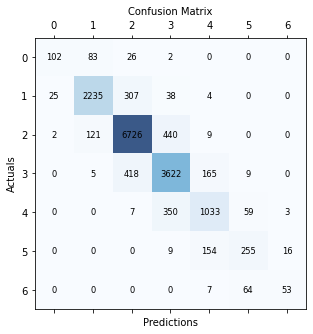



DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       213
           1       0.85      0.85      0.85      2609
           2       0.89      0.89      0.89      7298
           3       0.80      0.79      0.79      4219
           4       0.69      0.68      0.69      1452
           5       0.57      0.54      0.56       434
           6       0.57      0.57      0.57       124

    accuracy                           0.82     16349
   macro avg       0.69      0.70      0.69     16349
weighted avg       0.82      0.82      0.82     16349


r2: 0.4874722687455048

RMSE: 0.4874722687455048

Runtime of the model is 0.5077505111694336


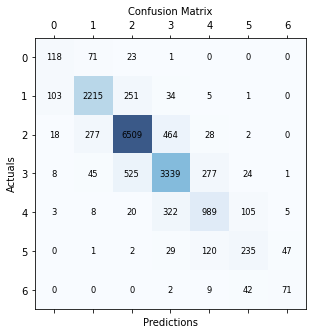



SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.00      0.00      0.00      2609
           2       0.45      1.00      0.62      7298
           3       0.00      0.00      0.00      4219
           4       0.00      0.00      0.00      1452
           5       0.00      0.00      0.00       434
           6       0.00      0.00      0.00       124

    accuracy                           0.45     16349
   macro avg       0.06      0.14      0.09     16349
weighted avg       0.20      0.45      0.28     16349


r2: 1.0887016443516988

RMSE: 1.0887016443516988

Runtime of the model is 1311.4787080287933


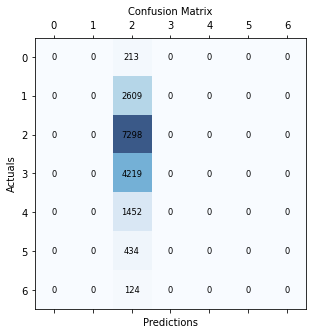



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       213
           1       0.92      0.88      0.90      2609
           2       0.92      0.94      0.93      7298
           3       0.87      0.89      0.88      4219
           4     

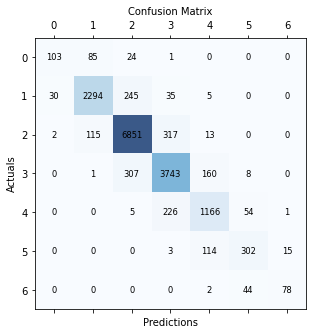

In [18]:
tree= DecisionTreeClassifier()
forest= RandomForestClassifier(n_estimators=1600,min_samples_split=6,min_samples_leaf= 1,max_features='auto',max_depth=80,bootstrap=False)
xboost= XGBClassifier(n_estimators=1400,max_depth=30,learning_rate=0.01,gamma= 1, colsample_bytree=0.8)
svc=SVC(C=0.1,gamma=0.01,kernel='rbf',) 
models= [
#     extra_tree, 
          forest, tree,svc,xboost ]
for model in models:
    start = time.time() #start time
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) #  predict on the test set
    end = time.time() # end time
    #========metrics======#
    print(model)
    clf_report= classification_report(y_test, y_pred)  #with precision, recall and f1-score for each class
    print(clf_report)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"\nr2: {rmse}") ##print mean square error and r2
    print(f"\nRMSE: {rmse}")
    
    print(f"\nRuntime of the model is {end - start}") ##run time 
    plot_conf_mat(y_test, y_pred)
    print("\n")